# Assignment

## Objective
In this assignment, you will apply Principal Component Analysis (PCA) to compress your own selfie. You will explore how reducing the number of principal components affects image quality and storage size.

In [1]:
#Loading necessary library
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA


## 1. Take a selfie and save it as `selfie.jpg` at the same folder you saved this assignment.

## 2. Load the image in grayscale format using the following code. 

In [2]:
#Loading the image in the graysclae
image = cv2.imread("selfie.JPG", cv2.IMREAD_GRAYSCALE)

## 3. Display the grayscale image and check the image size.

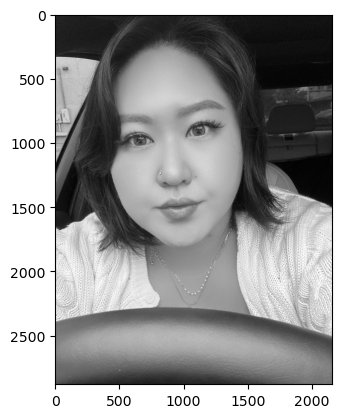

(2880, 2160)

In [3]:
#Display grayscale image
plt.imshow(image, cmap="gray")
plt.show()
#Checking the image size 
i_size = image.shape
i_size

## 4. Treat the columns as variables and apply PCA to compress the image. Try different values for `n_components` (e.g., 10, 20, 50, 100) and observe how the compression affects the image quality.

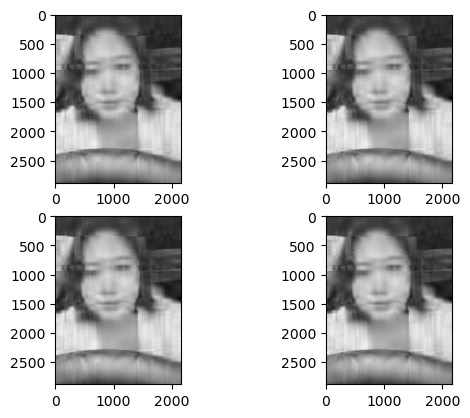

In [4]:
#loading nessary library 
from sklearn.decomposition import PCA

#sets upa 2x2 grid of subplots to display the results of PCA with different numbers of components
fig, ax = plt.subplots(2, 2)
#The image is normalized by dividing each pixel by 255 to scale the pixel values to a range of [0, 1].
normalized_i = image / 255.0

#Apply PCA with 10 Components
pca10 = PCA(n_components=10)
#transformed into 10 principal components
X2D10 = pca10.fit_transform(image)
#reconstructed back to its original form
X3D_inv10 = pca10.inverse_transform(X2D10)
# Show PCA compressed image
ax[0, 0].imshow(X3D_inv10, cmap='gray')  

#Apply PCA with 20 Components
pca20 = PCA(n_components=20)
X2D20 = pca20.fit_transform(image)
X3D_inv20 = pca20.inverse_transform(X2D20)
ax[0, 1].imshow(X3D_inv10, cmap='gray')

##Apply PCA with 50 Components
pca50 = PCA(n_components=50)
X2D50 = pca50.fit_transform(image)
X3D_inv50 = pca50.inverse_transform(X2D50)
ax[1, 0].imshow(X3D_inv10, cmap='gray')

#Apply PCA with 100 Components
pca100 = PCA(n_components=100)
X2D100 = pca100.fit_transform(image)
X3D_inv100 = pca100.inverse_transform(X2D100)
ax[1, 1].imshow(X3D_inv10, cmap='gray')

plt.show()

**Since the orginal image size is too big all of pictures quality is loss of detail**

## 5. Create a scree plot to assess how much cumulative variance can be captured by how many components.

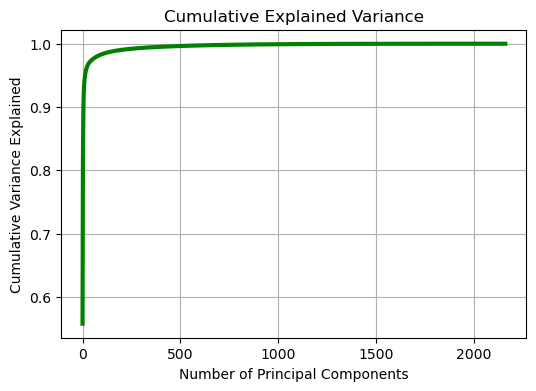

In [5]:
#Create PCA for compute the principal components of image
pca_o = PCA()
pca_o.fit(normalized_i)

#property of the PCA object that contains 
#the proportion of the total variance explained by each principal component
explained_v = pca_o.explained_variance_ratio_
# computes the cumulative sum of the explained variance ratio
cumulative_v = np.cumsum(explained_v)

#Cumulative explained variance plot
#sets the size of the plot
plt.figure(figsize=(6,4))
#explain cumulative_v, line graph, line is green
plt.plot(cumulative_v, linewidth=3, color='green')
#title
plt.title('Cumulative Explained Variance')
#x-label
plt.xlabel('Number of Principal Components')
#y-label
plt.ylabel('Cumulative Variance Explained')
#adds a grid
plt.grid(True)
#show plot
plt.show()


## 6. Import the image as RGB and plot its RGB channels, respectively.

In [6]:
#import the image as RGB 
image_rgb = cv2.imread("selfie.JPG")
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

# Split into R, G, B channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)

## 7. Write a function that applies PCA to a given image with a given threshold of explained variance ratio (two inputs for the function: (1) the image and (2) the explained variance ratio threshold). Save PCA compressed RGB images as `r_reconstructed`, `g_reconstructed`, `b_reconstructed`, respectively. You can choose the threshold by yourself.

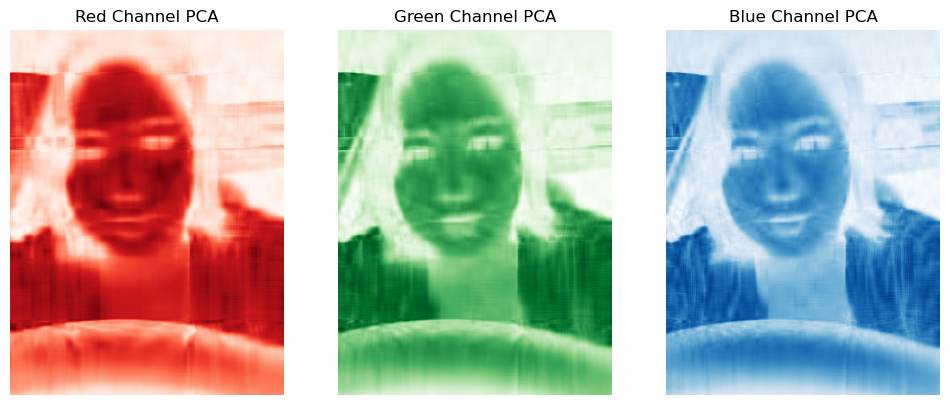

In [8]:
#function that takes rgb and performing PCA
def apply_pca_to_rgb(image, threshold):
    # Normalize image to range [0,1]
    normalized_i = image / 255.0
    # Split into R, G, B channels
    r_channel, g_channel, b_channel = cv2.split(normalized_i)

    def apply_pca(channel):
        #shape of the channel is extracted
        h, w = channel.shape
        # Keep 2D format
        dataset = channel.reshape(h, w)  

        # Apply PCA
        pca = PCA()
        pca.fit(dataset)

        #calculating explained_variance_ratio's cumulative sum
        cumulative_v = np.cumsum(pca.explained_variance_ratio_)
        #Specified amount of variance, which is determined by the threshold
        num_c = np.argmax(cumulative_v >= threshold) + 1

        # Apply PCA with determined number of components
        pca_o = PCA(n_components=num_c)
        X2D = pca_o.fit_transform(dataset)
        re_channel = pca_o.inverse_transform(X2D)

        # Rescale to 0-255 and return
        return np.clip(re_channel * 255, 0, 255).astype(np.uint8)

    # Apply PCA separately to each channel
    r_reconstructed = apply_pca(r_channel)
    g_reconstructed = apply_pca(g_channel)
    b_reconstructed = apply_pca(b_channel)

    # Save each compressed channel separately
    cv2.imwrite("pca_red.jpg", r_reconstructed)
    cv2.imwrite("pca_green.jpg", g_reconstructed)
    cv2.imwrite("pca_blue.jpg", b_reconstructed)

    return r_reconstructed, g_reconstructed, b_reconstructed

# Load RGB image
image_rgb = cv2.imread("selfie.JPG")
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Set variance threshold for PCA
threshold = 0.95  

# Apply PCA to each channel and save images
r_reconstructed, g_reconstructed, b_reconstructed = apply_pca_to_rgb(image_rgb, threshold)

# Display the PCA-compressed R, G, B Channels (without original image)
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow(r_reconstructed, cmap="Reds")
ax[0].set_title("Red Channel PCA")
ax[0].axis('off')

ax[1].imshow(g_reconstructed, cmap="Greens")
ax[1].set_title("Green Channel PCA")
ax[1].axis('off')

ax[2].imshow(b_reconstructed, cmap="Blues")
ax[2].set_title("Blue Channel PCA")
ax[2].axis('off')

plt.show()

    

## 8. Merge the compressed RGB channels back into an image using the code below and plot the original and PCA-compressed RGB images.

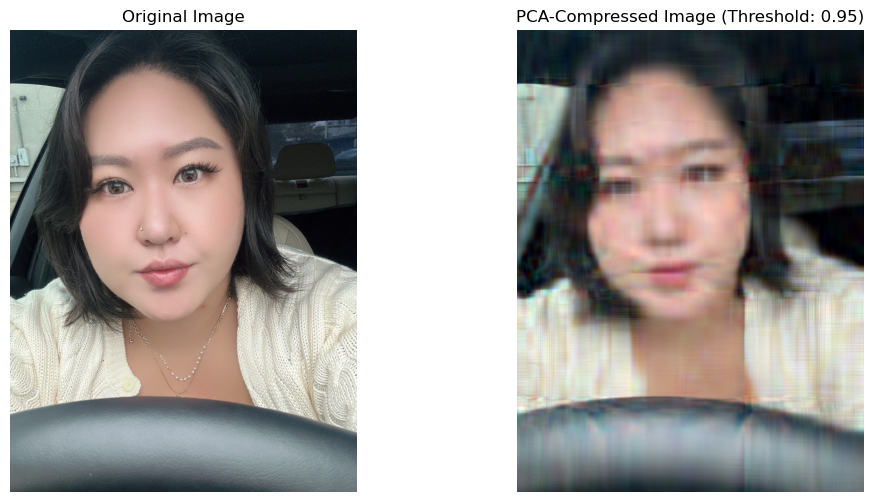

In [9]:
#merge the three compressed channels back into a single RGB image
compressed_image = cv2.merge([r_reconstructed, g_reconstructed, b_reconstructed])
    
# Display both original and PCA-compressed images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
ax[0].imshow(image_rgb)  # Display the original image
ax[0].set_title("Original Image")
ax[0].axis('off')

# PCA Compressed Image
ax[1].imshow(compressed_image)  
ax[1].set_title(f"PCA-Compressed Image (Threshold: {threshold})")
ax[1].axis('off')

# Show both images
plt.show()
